In [1]:
import pandas as pd
import numpy as np
from matrixprofile import *

%matplotlib inline
import matplotlib.pyplot as plt
from saxpy.sax import sax_via_window

In [2]:
superuser_lvl4 = pd.read_csv('./superusers_lvl4.csv')

C:\Users\mistr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
superuser_lvl4.head()

,Unnamed: 0,X1,userID,time,subjectID,id.x,type,relatedID,data,new.category,...,metadata_finished_at,metadata_started_at,uniqueID,gold_score,annotations_value_choice_gold,session,event_order,before_learning,aftergold,category2
0,1,21783,1057540,2017-01-14 13:53:42,3774644,14318236,classify,NaN,NaN,classify,...,2017-01-14 13:53:36,2017-01-14 13:48:20,D97xUfVCDI,0.0,LIGHTMODULATION,5,1,NaN,Positive,classify
1,2,21784,1057540,2017-01-14 13:54:07,3774812,14318245,classify,NaN,NaN,classify,...,2017-01-14 13:54:01,2017-01-14 13:53:42,AwyhXEEnr7,1.0,LIGHTMODULATION,5,2,NaN,Negative,classify
2,3,21785,1057540,2017-01-14 13:55:01,3816698,14318265,classify,NaN,NaN,classify,...,2017-01-14 13:54:54,2017-01-14 13:54:03,NaN,NaN,NaN,5,3,NaN,Positive,classify
3,4,21786,1057540,2017-01-14 13:56:08,3825811,14318318,classify,NaN,NaN,classify,...,2017-01-14 13:55:56,2017-01-14 13:54:54,NaN,NaN,NaN,5,4,NaN,NaN,classify
4,5,21787,1057540,2017-01-14 13:56:30,3841017,14318330,classify,NaN,NaN,classify,...,2017-01-14 13:56:23,2017-01-14 13:55:56,NaN,NaN,NaN,5,5,NaN,NaN,classify


In [4]:
superuser_lvl4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265693 entries, 0 to 265692
Data columns (total 28 columns):
Unnamed: 0                       265693 non-null int64
X1                               265693 non-null int64
userID                           265693 non-null int64
time                             265693 non-null object
subjectID                        265693 non-null int64
id.x                             265693 non-null int64
type                             265693 non-null object
relatedID                        49465 non-null object
data                             362 non-null object
new.category                     265693 non-null object
GoldLabel                        45163 non-null float64
id.y                             265693 non-null float64
links_project                    265693 non-null int64
links_workflow                   265693 non-null int64
metadata_workflow_version        265693 non-null float64
annotations_value_choiceINT      265693 non-null int64
gra

In [5]:
other_lvl4 = pd.read_csv('./other_lvl4.csv') 

In [6]:
other_lvl4.head()

,Unnamed: 0,X1,userID,time,subjectID,id.x,type,relatedID,data,new.category,...,metadata_finished_at,metadata_started_at,uniqueID,gold_score,annotations_value_choice_gold,session,event_order,before_learning,aftergold,category2
0,1,306.0,100423,2016-10-15 11:24:02,3774485,10681340,classify,NaN,NaN,classify,...,2016-10-15 11:24:03,2016-10-15 11:22:12,U49uqUMyK6,1.0,HELIX,6,3,NaN,Positive,classify
1,2,307.0,100423,2016-10-15 11:24:35,3777724,10681387,classify,NaN,NaN,classify,...,2016-10-15 11:24:36,2016-10-15 11:24:04,KoNq45tzNK,0.0,TOMTE,6,4,NaN,Positive,classify
2,3,308.0,100423,2016-10-15 11:25:05,3778431,10681449,classify,NaN,NaN,classify,...,2016-10-15 11:25:07,2016-10-15 11:24:40,rTb5Gl65Ru,1.0,KOIFISH,6,5,NaN,Negative,classify
3,4,309.0,100423,2016-10-15 11:25:29,3825326,10681479,classify,NaN,NaN,classify,...,2016-10-15 11:25:30,2016-10-15 11:25:12,NaN,NaN,NaN,6,6,NaN,Positive,classify
4,5,310.0,100423,2016-10-15 11:25:48,3833059,10681492,classify,NaN,NaN,classify,...,2016-10-15 11:25:50,2016-10-15 11:25:30,NaN,NaN,NaN,6,7,NaN,NaN,classify


In [7]:
s4= superuser_lvl4.iloc[:,[2,27]]
o4 = other_lvl4.iloc[:,[2,27]]

In [8]:
s4.head()

,userID,category2
0,1057540,classify
1,1057540,classify
2,1057540,classify
3,1057540,classify
4,1057540,classify


In [9]:
s4_g = s4.groupby('userID')

In [46]:
s4_g.filter(lambda x: len(x)>10000)

,userID,category2
7137,1430195,classify
7138,1430195,classify
7139,1430195,classify
7140,1430195,classify
7141,1430195,classify
...,...,...
248553,5209,classify
248554,5209,classify
248555,5209,classify
248556,5209,classify


In [10]:
o4_g = o4.groupby('userID')

In [45]:
o4_g.filter(lambda x: len(x)>10000)

,userID,category2
150741,1536645,classify
150742,1536645,classify
150743,1536645,classify
150744,1536645,classify
150745,1536645,classify
...,...,...
532842,368074,classify
532843,368074,classify
532844,368074,classify
532845,368074,classify


In [15]:
s4_list_grouped = []
for name, group in s4_g:
    my_list = [0]
    data1 = group.category2.values.tolist()
    for i in range(0,len(data1)):
        if data1[i] == 'classify':
            my_list.append(my_list[-1]+3)
        elif data1[i] == 'communal':
            my_list.append(my_list[-1]+2)
        elif data1[i] == 'exploring':
            my_list.append(my_list[-1]+1)
        elif data1[i] == 'learning':
            my_list.append(my_list[-1]+0)
        elif data1[i] == 'personal':
            my_list.append(my_list[-1]-1)
        elif data1[i] == 'socialize':
            my_list.append(my_list[-1]-2)
        elif data1[i] == 'view discussions':
            my_list.append(my_list[-1]-3)
    s4_list_grouped = s4_list_grouped+my_list[1:]

In [16]:
o4_list_grouped = []
for name, group in o4_g:
    my_list = [0]
    data1 = group.category2.values.tolist()
    for i in range(0,len(data1)):
        if data1[i] == 'classify':
            my_list.append(my_list[-1]+3)
        elif data1[i] == 'communal':
            my_list.append(my_list[-1]+2)
        elif data1[i] == 'exploring':
            my_list.append(my_list[-1]+1)
        elif data1[i] == 'learning':
            my_list.append(my_list[-1]+0)
        elif data1[i] == 'personal':
            my_list.append(my_list[-1]-1)
        elif data1[i] == 'socialize':
            my_list.append(my_list[-1]-2)
        elif data1[i] == 'view discussions':
            my_list.append(my_list[-1]-3)
    o4_list_grouped = o4_list_grouped+my_list[1:]

### Function to group the dataframe by 'userID', apply appropriate transformation to category2 values for each user, and create a matrix profile

In [11]:
def create_matrixprofile_lvl(df):
    print("User id:\n",df.userID.unique())
    print("Categories:\n",df['category2'].value_counts())
    groupeddf = df.groupby('userID')
    my_list_grouped = []
    for name, group in groupeddf:
        my_list = [0]
        data1 = group.category2.values.tolist()
        for i in range(0,len(data1)):
            if data1[i] == 'classify':
                my_list.append(my_list[-1]+3)
            elif data1[i] == 'communal':
                my_list.append(my_list[-1]+2)
            elif data1[i] == 'exploring':
                my_list.append(my_list[-1]+1)
            elif data1[i] == 'learning':
                my_list.append(my_list[-1]+0)
            elif data1[i] == 'personal':
                my_list.append(my_list[-1]-1)
            elif data1[i] == 'socialize':
                my_list.append(my_list[-1]-2)
            elif data1[i] == 'view discussions':
                my_list.append(my_list[-1]-3)
        my_list_grouped = my_list_grouped+my_list[1:]
    print("Creating matrixprofile...")
    my_listn = matrixProfile.to_np_array(my_list_grouped)
    m = 10
    pattern = my_listn
    mp = matrixProfile.stomp(pattern,m)
    print("Done")
    return (mp, pattern, m)

#### Superuser level 4

In [54]:
mp_s4, pattern, m = create_matrixprofile_lvl(s4_g.filter(lambda x:len(x)>15000))

User id:
 [1430195 1536599 1646393]
Categories:
 classify    58452
Name: category2, dtype: int64
Creating matrixprofile...
Done


Text(0.5, 0, 'Sample')

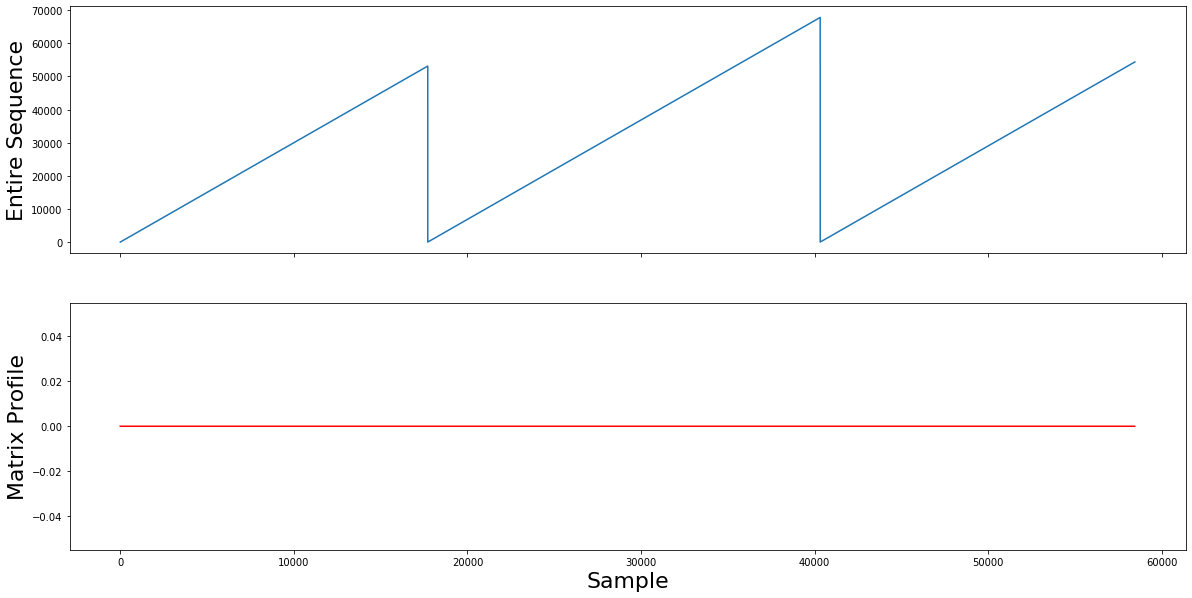

In [55]:
mp_adj = np.append(mp_s4[0],np.zeros(m-1)+np.nan)

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Entire Sequence', size=22)

ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

#### Other users level 4

In [58]:
mp_o4, pattern, m = create_matrixprofile_lvl(o4_g.filter(lambda x: len(x)>11000))

User id:
 [1536645 1553335 1617707]
Categories:
 classify    49772
Name: category2, dtype: int64
Creating matrixprofile...
Done


Text(0.5, 0, 'Sample')

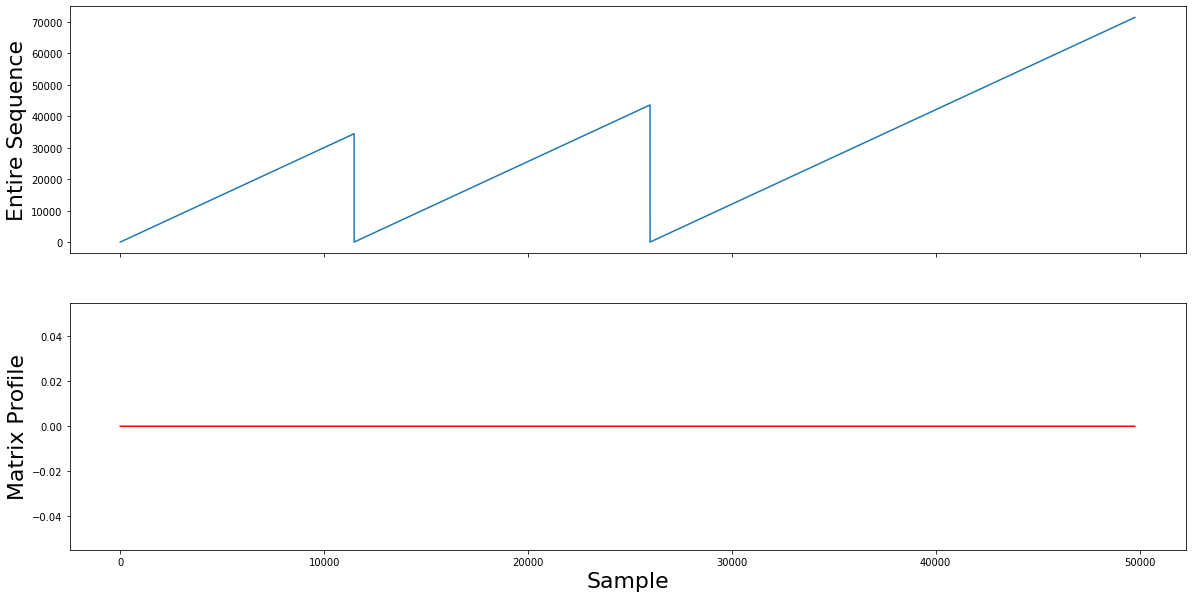

In [59]:
mp_adj = np.append(mp_o4[0],np.zeros(m-1)+np.nan)

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Entire Sequence', size=22)

ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

#### Similarly for superuser level 3 and other user level 3

In [62]:
superuser_lvl3 = pd.read_csv('./superusers_lvl3.csv')
other_lvl3 = pd.read_csv('./other_lvl3.csv')
s3 = superuser_lvl3.iloc[:,[2,27]]
o3 = other_lvl3.iloc[:,[2,27]]
s3_g = s3.groupby('userID')
o3_g = o3.groupby('userID')

In [67]:
mp_s3, pattern, m = create_matrixprofile_lvl(s3_g.filter(lambda x: len(x)>5000))

User id:
 [1536599    3462]
Categories:
 classify    41077
Name: category2, dtype: int64
Creating matrixprofile...
Done


Text(0.5, 0, 'Sample')

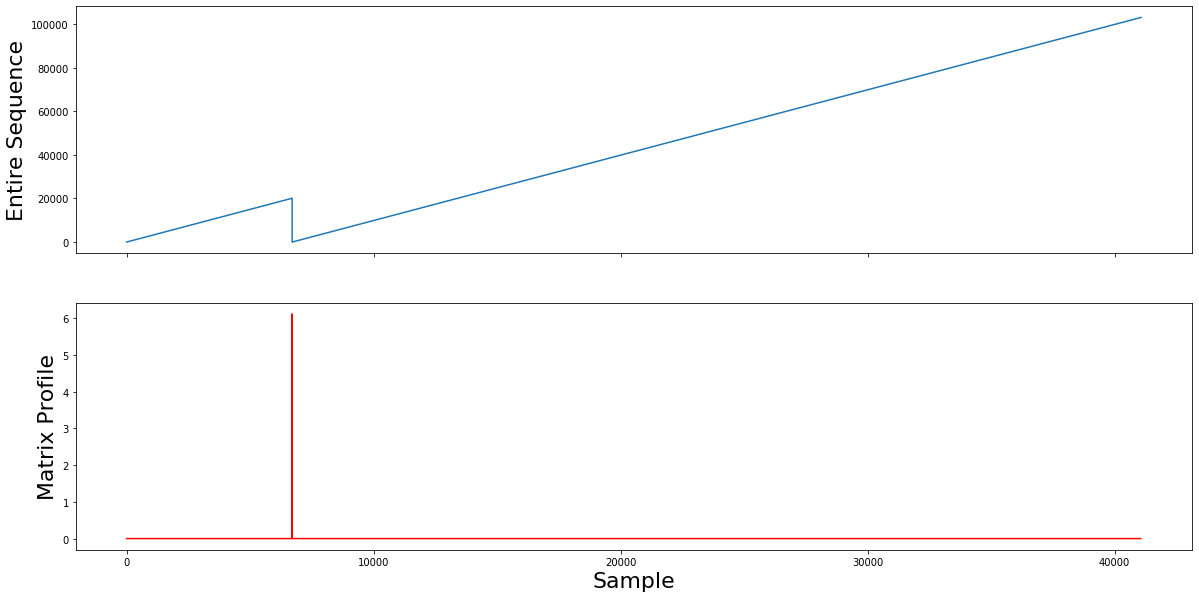

In [68]:
mp_adj = np.append(mp_s3[0],np.zeros(m-1)+np.nan)

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Entire Sequence', size=22)

ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

In [69]:
mp_o3, pattern, m = create_matrixprofile_lvl(o3_g.filter(lambda x: len(x)>5000))

User id:
 [1472224 1553335 1558792  821413]
Categories:
 classify    27909
Name: category2, dtype: int64
Creating matrixprofile...
Done


Text(0.5, 0, 'Sample')

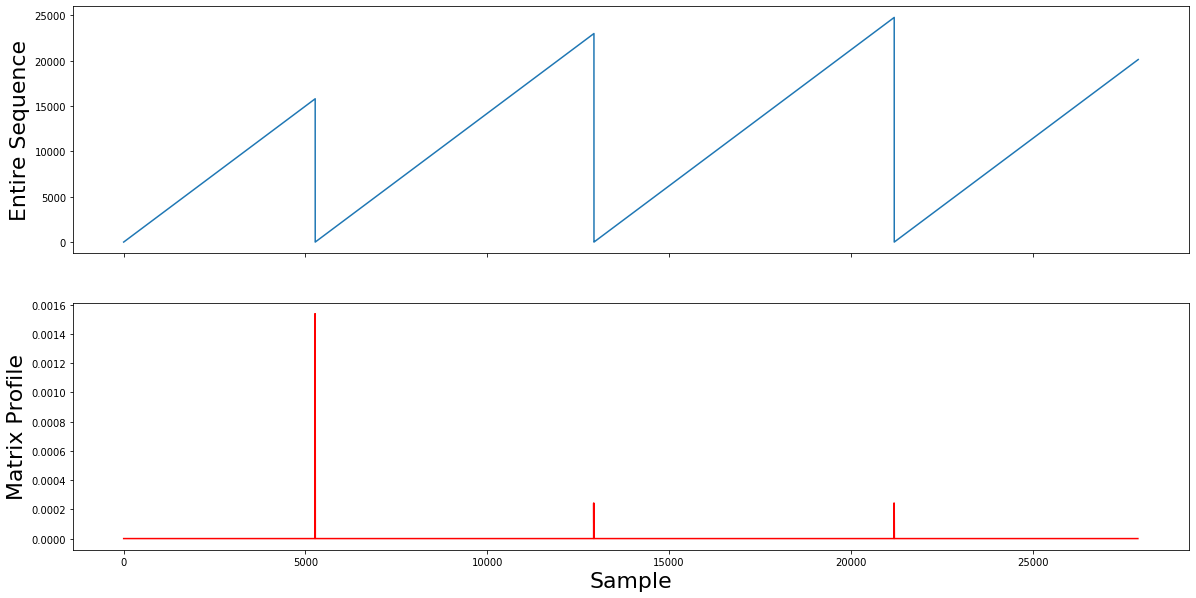

In [70]:
mp_adj = np.append(mp_o3[0],np.zeros(m-1)+np.nan)

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Entire Sequence', size=22)

ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

#### Similarly for superuser level 2 and other user level 2

In [71]:
superuser_lvl2 = pd.read_csv('./superusers_lvl2.csv')
other_lvl2 = pd.read_csv('./other_lvl2.csv')
s2 = superuser_lvl2.iloc[:,[2,27]]
o2 = other_lvl2.iloc[:,[2,27]]
s2_g = s2.groupby('userID')
o2_g = o2.groupby('userID')

In [77]:
mp_s2, pattern, m = create_matrixprofile_lvl(s2)

User id:
 [1057540 1191124 1191730 1202620 1244306 1374419 1430195 1430492 1443190
 1455469 1455696 1483245 1502635 1508485 1513387 1517545 1517687 1520048
 1524438 1525581 1529419 1530603 1530621 1530882 1533058 1534622 1534755
 1536599 1542559 1543664 1548316 1551029 1559443 1559856 1563309 1563323
 1565910 1575381 1575450 1598413 1599151 1614870 1630952 1632885 1646393
 1664875 1677904 1680775    1856    2236  315840  316120  325635    3307
    3427    3462  424439    4261  450605  501682    5209  767062   95974
     986]
Categories:
 classify    16163
Name: category2, dtype: int64
Creating matrixprofile...
Done


Text(0.5, 0, 'Sample')

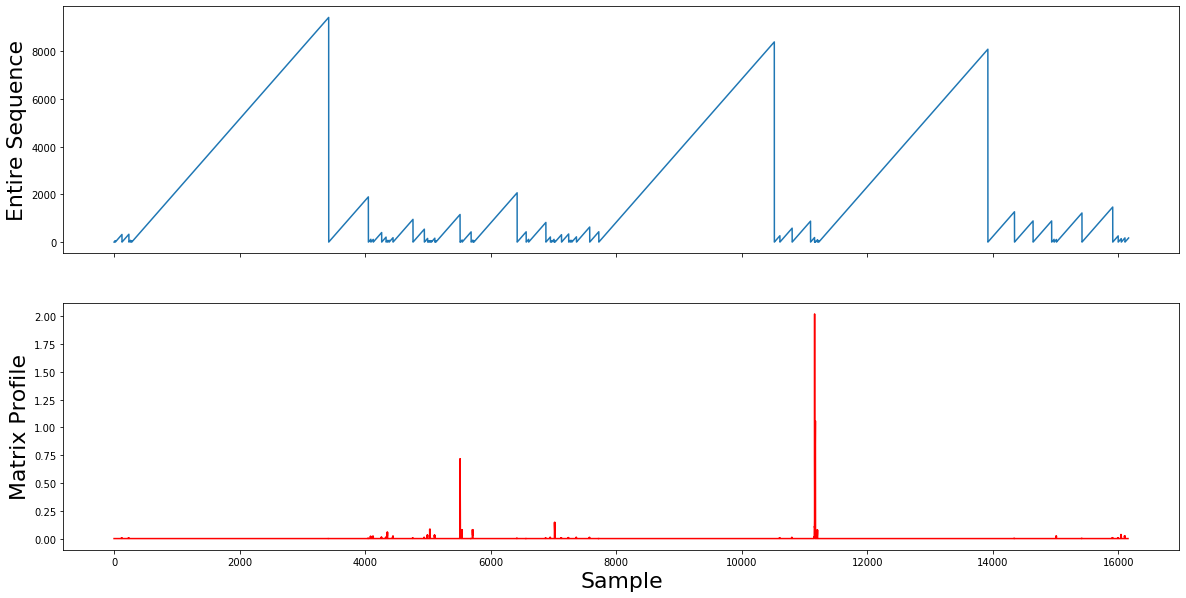

In [78]:
mp_adj = np.append(mp_s2[0],np.zeros(m-1)+np.nan)

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Entire Sequence', size=22)

ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

In [82]:
mp_o2, pattern, m = create_matrixprofile_lvl(o2_g.filter(lambda x: len(x)>1000))

User id:
 [1382475 1533562 1586183 1647840 1652758 1695982    4987  821413]
Categories:
 classify    13196
Name: category2, dtype: int64
Creating matrixprofile...
Done


Text(0.5, 0, 'Sample')

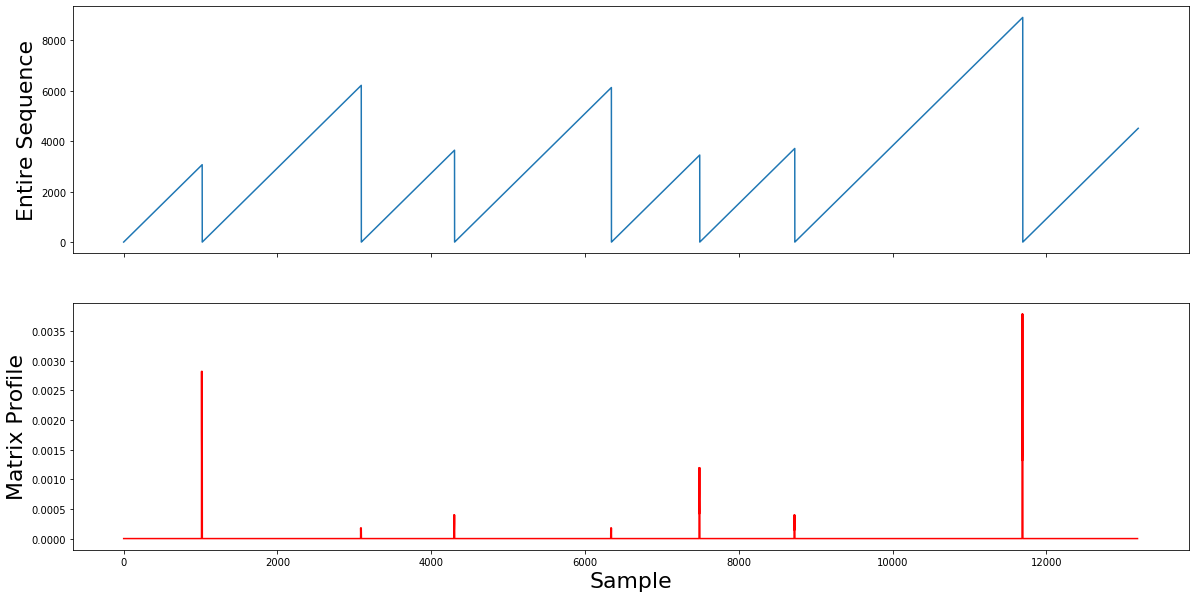

In [83]:
mp_adj = np.append(mp_o2[0],np.zeros(m-1)+np.nan)

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Entire Sequence', size=22)

ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

#### Similarly for superuser level 1 and other user level 1

In [84]:
superuser_lvl1 = pd.read_csv('./superusers_lvl1.csv')
other_lvl1 = pd.read_csv('./other_lvl1.csv')
s1 = superuser_lvl1.iloc[:,[2,27]]
o1 = other_lvl1.iloc[:,[2,27]]
s1_g = s1.groupby('userID')
o1_g = o1.groupby('userID')

C:\Users\mistr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [85]:
mp_s1, pattern, m = create_matrixprofile_lvl(s1_g.filter(lambda x: len(x)>1000))

User id:
 [1536599 1543664 1598413    3462]
Categories:
 classify    7289
Name: category2, dtype: int64
Creating matrixprofile...
Done


Text(0.5, 0, 'Sample')

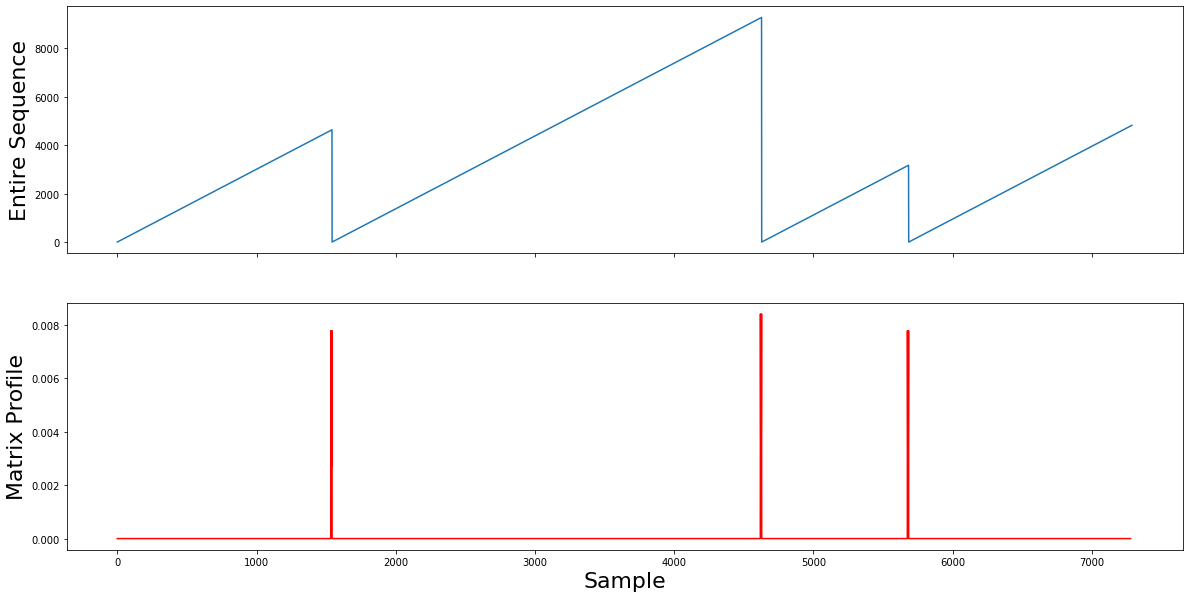

In [86]:
mp_adj = np.append(mp_s1[0],np.zeros(m-1)+np.nan)

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Entire Sequence', size=22)

ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

In [87]:
mp_o1, pattern, m = create_matrixprofile_lvl(o1_g.filter(lambda x: len(x)>1000))

User id:
 [1384863 1398353     143 1499717 1504256 1525407 1553604 1557803 1615452
 1645499 1648909 1660346 1689935  290936  452257  821413]
Categories:
 classify    27658
Name: category2, dtype: int64
Creating matrixprofile...
Done


Text(0.5, 0, 'Sample')

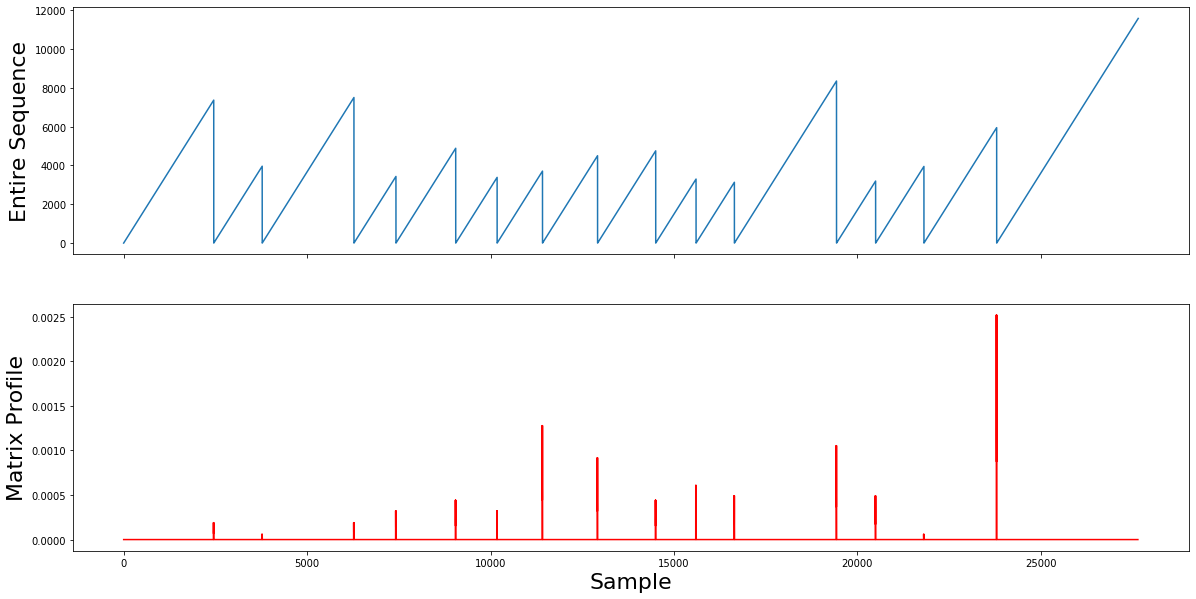

In [88]:
mp_adj = np.append(mp_o1[0],np.zeros(m-1)+np.nan)

fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Entire Sequence', size=22)

ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

## FastDTW implementation

In [15]:
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

In [16]:
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(pd.read_csv("./combined_activities_51319.csv"))

#x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
lbl = LabelEncoder() 
lbl.fit(list(df['new.category2'].values)) 
s4.category2 = lbl.transform(list(s4.category2.values))
 
o4.category2 = lbl.transform(list(o4.category2.values))

C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [102]:
s4.category2.unique()
s4['trend'] = superuser_lvl4['event_order']
s4['period'] = s4[['trend', 'category2']].apply(lambda x: list(x), axis=1)

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
s4.period

0         [1, 0]
1         [2, 0]
2         [3, 0]
3         [4, 0]
4         [5, 0]
           ...  
265688    [2, 0]
265689    [3, 0]
265690    [4, 0]
265691    [5, 0]
265692    [1, 0]
Name: period, Length: 265693, dtype: object

In [104]:
o4['trend'] = other_lvl4['event_order']
o4['period'] = o4[['trend', 'category2']].apply(lambda x: list(x), axis=1)

In [140]:
x = np.array(s4.category2.values[:30000])
#y = np.array([[2,2], [3,3], [4,4]])
y = np.array(o4.category2.values[:30000])
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)
print(path)

In [141]:
xa = []
ya = []
for i in path:
    xa.append(i[0])
    ya.append(i[1])

AttributeError: 'tuple' object has no attribute 'plot'

In [135]:
xa

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [127]:
ya

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


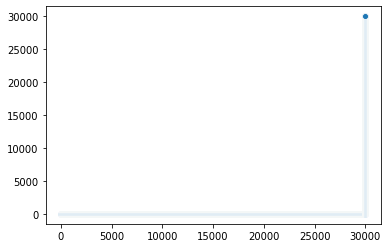

In [138]:
import seaborn as sns
sns.scatterplot(ya,xa)

In [142]:
??fastdtw

## iSax implementation with sliding window

In [13]:
??sax_via_window

In [17]:
sax1 = sax_via_window(s4.category2, 10, 3, 3, "none", 0.01)

KeyError: 0